In [1]:
import psycopg2 as pg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import re
import networkx as nx
from collections import Counter, defaultdict
from __future__ import division
import community
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Connect to psql database
conn = pg2.connect(dbname='lastfm', user='evansadler', host='/tmp')
c = conn.cursor()

In [128]:
query = 'select * from pairs;'
df = pd.read_sql_query(query, conn)


In [301]:
df.max()

count        1839
artist1     wilco
artist2    weezer
dtype: object

In [312]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
count,560,1402.801786,165.542524,1,1356,1459,1509.25,1539


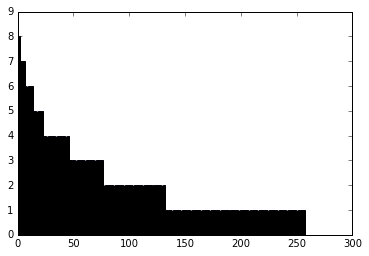

In [311]:
y = df['count'].value_counts()
x = np.arange(0,len(y))
plt.bar(x,y)
#plt.xlim((0,200))
plt.show()

In [317]:
df['count'] = pd.qcut(df['count'], 5,labels=[1,2,3,4,5])

In [302]:
df['count'] = 1840 - df['count']

In [272]:
df = df.ix[df['count'] > 300,:]

In [318]:
subset = df[['artist1', 'artist2','count']]
tuples = [tuple(x) for x in subset.values]
G=nx.Graph()
G.add_weighted_edges_from(tuples)

In [274]:
subset = df[['artist1', 'artist2']]
tuples = [tuple(x) for x in subset.values]
G=nx.Graph()
G.add_edges_from(tuples)

In [304]:
part = community.best_partition(G)
values = [part.get(node) for node in G.nodes()]

In [305]:
community.modularity(part, G)

0.3363926428334766

In [306]:
new_dict = defaultdict(list)
for k, v in part.iteritems():
    new_dict[v].append(k)

In [307]:
new_dict.keys()

[0, 1, 2, 3, 4]

In [279]:
new_dict

defaultdict(list,
            {0: ['paramore',
              'the flaming lips',
              'snow patrol',
              'minus the bear',
              'bloc party',
              'dashboard confessional',
              'sigur rs',
              'blink-182',
              'tegan and sara',
              'kings of leon',
              'panic at the disco',
              'death cab for cutie',
              'stars',
              'taking back sunday',
              'fall out boy',
              'the postal service',
              'my chemical romance',
              'regina spektor',
              'brand new',
              'say anything',
              'jimmy eat world',
              'interpol'],
             1: ['morrissey',
              'frank sinatra',
              'band of horses',
              'explosions in the sky',
              'simon & garfunkel',
              'sonic youth',
              'portishead',
              'the magnetic fields',
              'r.e.m.',
     

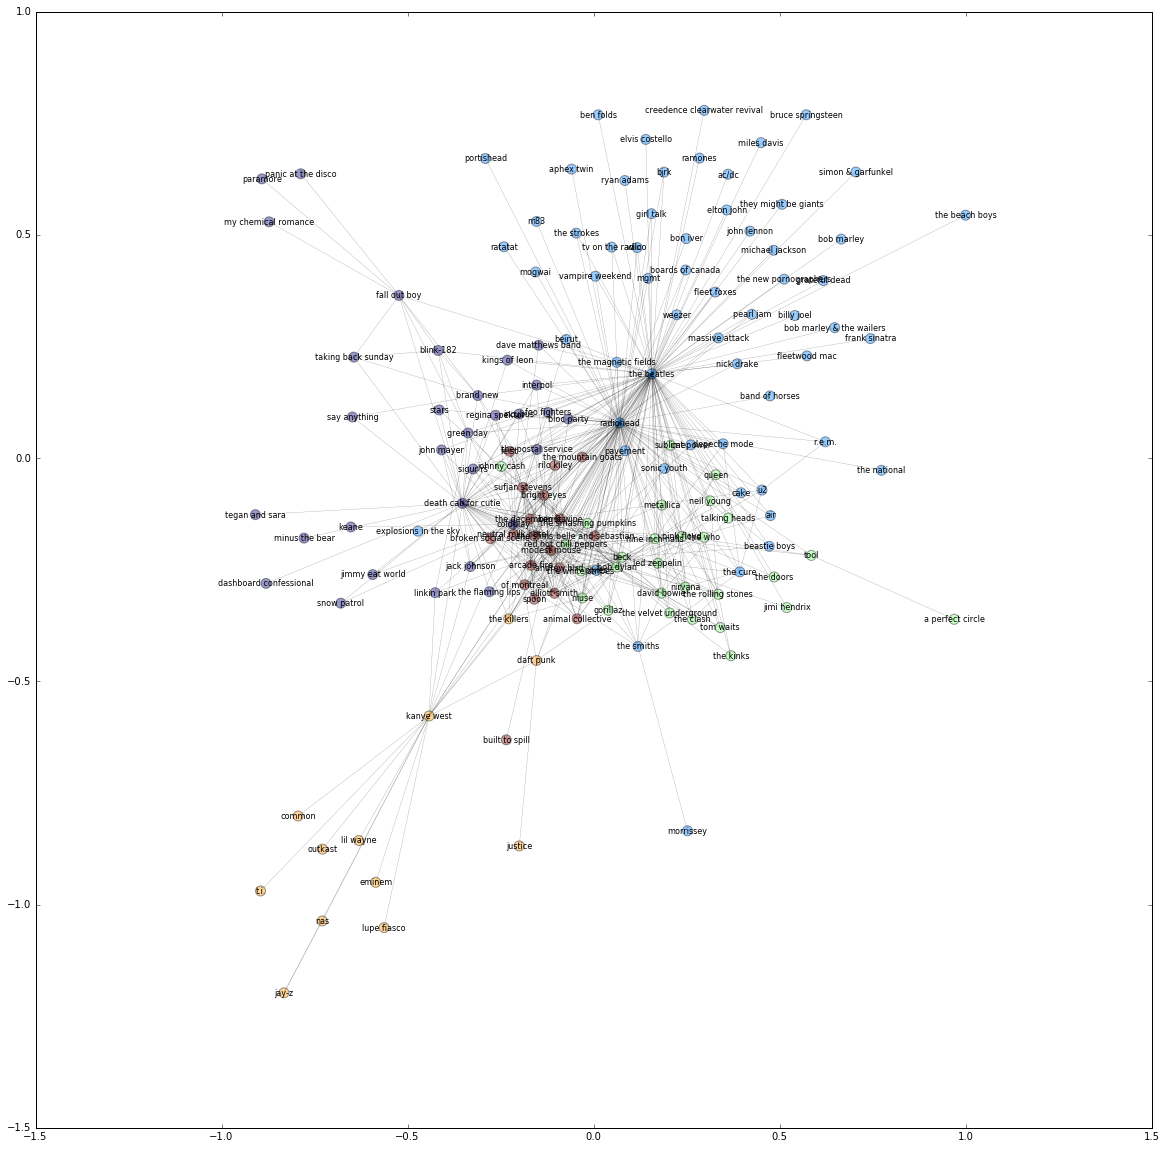

In [336]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=100, width=0.3,font_size = 8,font_weight = 500, with_labels=True, alpha=0.4)
plt.show()

In [281]:
dc = nx.degree_centrality(G)

In [282]:
df_dc = pd.DataFrame(dc.values(), index = dc.keys())

In [298]:
df_dc.sort(0, ascending = False).head(10)

,0
the beatles,0.758389
radiohead,0.651007
death cab for cutie,0.335570
modest mouse,0.288591
coldplay,0.248322
beck,0.208054
sufjan stevens,0.181208
bob dylan,0.174497
the shins,0.161074
red hot chili peppers,0.154362


In [299]:
bc = nx.betweenness_centrality(G, weight = 'weight')
df_bc = pd.DataFrame(bc.values(), index = bc.keys())

In [328]:
df_bc.sort(0, ascending=False).head(10)

,0
the beatles,0.496103
radiohead,0.312764
kanye west,0.107418
death cab for cutie,0.102002
coldplay,0.043465
fall out boy,0.041248
modest mouse,0.033910
daft punk,0.013633
the smiths,0.013565
tool,0.013423


In [243]:
ec = nx.eigenvector_centrality(G, weight = 'weight')
df_ec = pd.DataFrame(ec.values(), index = ec.keys())

In [244]:
df_ec.sort(0, ascending=False).head()

,0
the beatles,0.281044
radiohead,0.266908
death cab for cutie,0.231167
modest mouse,0.220749
beck,0.196953


In [268]:
bmc = [x[0] for x in Counter(bc).most_common(25)]
dmc = [x[0] for x in Counter(dc).most_common(25)]
emc = [x[0] for x in Counter(ec).most_common(25)]

In [269]:
def difference(c1,c2):
    union = list(set(c1) & set(c2))
    intersect = list(set(c1) | set(c2))
    return len(union) / float(len(intersect))

In [270]:
difference(bmc, dmc)

0.47058823529411764

In [271]:
list(set(bmc) - set(dmc))

['jack johnson',
 'brand new',
 'fall out boy',
 'tool',
 'the smiths',
 'linkin park',
 'blink-182',
 'jay-z',
 'metallica']

In [329]:
df_dc.ix[df_dc.index.str.contains("mountain"),:]

,0
the mountain goats,0.033557


In [57]:
df.ix[(df.artist1 == 'miles davis') | (df.artist1 == 'miles davis') ,:]

,count,artist1,artist2
189695,15,miles davis,311
189696,9,miles davis,[unknown]
189697,2,miles davis,aaliyah
189698,18,miles davis,against me!
189699,11,miles davis,aimee mann
189700,49,miles davis,al green
189701,11,miles davis,alanis morissette
189702,20,miles davis,alice in chains
189703,12,miles davis,alkaline trio
189704,1,miles davis,all time low


In [103]:
df.ix[(df.artist1 == 'michael jackson'),:]

,count,artist1,artist2
157585,694,michael jackson,alicia keys
157636,697,michael jackson,beyonc
157674,674,michael jackson,britney spears
157709,657,michael jackson,coldplay
157720,668,michael jackson,daft punk
157728,688,michael jackson,david bowie
157733,680,michael jackson,death cab for cutie
157739,696,michael jackson,depeche mode
157771,697,michael jackson,elton john
157774,699,michael jackson,elvis presley
